In [1]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


# Framingham Risk Score Revisited

## Part a

In [2]:
# Importing medical data
import scipy.io

# LOADS IN THE MEDICAL DATA IN THE FORM OF A PYTHON DICTIONARY.
# Data credit: CDC http://www.cdc.gov/nchs/nhanes.htm
data = scipy.io.loadmat('CVDdata.mat')

#UNPACKING DATA INTO COLUMN VECTORS
AGE = data['AGE']
TC = data['TC']
HDL = data['HDL']
SBP = data['SBP']
DIA = data['DIABETIC']
SMK = data['SMOKER']
p = data['pNoisy']

# Write expressions for b, A1, A2, A3, A4, A5, A6
# It will help to use the identity log_n(z) = log(z)/log(n)
# Note: np.log(z) is the natural log, ln(z)

def transp(p): return np.log(np.log(1-p)/np.log(0.95))+26.1931

b = transp(p) # the risk scores

A1 = np.log(AGE)
A2 = np.log(TC)
A3 = np.log(HDL)
A4 = np.log(SBP)
A5 = DIA
A6 = SMK

## Part b

In [3]:
# Write expressions for b and A
# the function np.hstack will be helpful for constructing A
b = b
A = np.hstack([A1,A2,A3,A4,A5,A6])

## Part c

In [4]:
# Write an expression for xhat

xhat = np.dot(np.dot(np.linalg.inv(np.dot(A.T,A)),A.T),b)

print("The estimated values for x are xhat=" + str(xhat.T))

The estimated values for x are xhat=[[ 2.34337819  1.24052179 -0.6692379   2.6851967   0.70530438  0.51329156]]


## Part d

In [5]:
# the model estimate bhat, and the squared error e2
bhat = np.dot(A,xhat)
e2 = np.linalg.norm(b-bhat,2)**2

print("The sum of squared errors is " + str(e2))

The sum of squared errors is 0.695064786826


## Part e

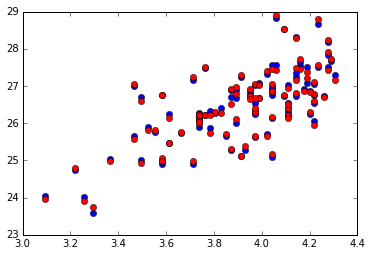

In [6]:
# Linear plots, pick an index below (0,1,2,etc). This code will plot b and bhat vs Ai
i = 0
plt.plot(A[:,i],b,'ob')
plt.plot(A[:,i],bhat,'or')

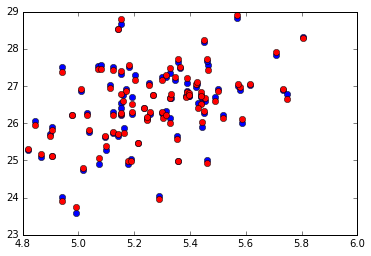

In [7]:
# Linear plots, pick an index below (0,1,2,etc). This code will plot b and bhat vs Ai
i = 1
plt.plot(A[:,i],b,'ob')
plt.plot(A[:,i],bhat,'or')

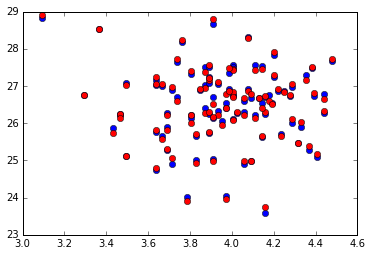

In [8]:
# Linear plots, pick an index below (0,1,2,etc). This code will plot b and bhat vs Ai
i = 2
plt.plot(A[:,i],b,'ob')
plt.plot(A[:,i],bhat,'or')

## Part f

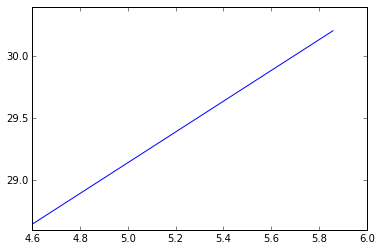

In [9]:
# Here are the values for the test plot
age_test = 55
tc_test_vector = np.linspace(100,350,(350-100+1))
hdl_test = 25
sbp_test = 220
dia_test = 1
smk_test = 1

A2_test = np.zeros(tc_test_vector.size)
b_test = np.zeros(tc_test_vector.size)

for ind in range(tc_test_vector.size):
    tc_test = tc_test_vector[ind];
    # Use the values for age_test, tc_test, hdl_test, sbp_test, dia_test
    # and smk_test to calculate the next value for b_test (y axis value)
    # and A2_test (x_axis value)
    b_test[ind] = xhat[0]*np.log(age_test) + xhat[1]*np.log(tc_test) + \
    xhat[2]*np.log(hdl_test) + xhat[3]*np.log(sbp_test) + xhat[4]*dia_test + \
    xhat[5]*smk_test
    A2_test[ind] = np.log(tc_test)

plt.plot(A2_test,b_test,'-b')

## Part g

In [10]:
# Perturb xhat from the solution above, store into x_perturbed and replot.

# Use the following example expression with different pertrubations.
x_perturbed = xhat+np.matrix([.1, 0.2, 0.2, -0.3, 0.1, 0.32]).T

# What are the new estimated b values in terms of x_perturbed?
b_perturbed = np.dot(A,x_perturbed)

The sum of squared errors after perturbing is 77.3212252815


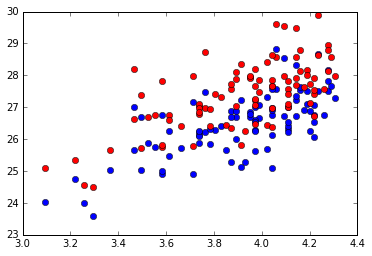

In [11]:
# Plot again
i=0
plt.plot(A[:,i],b,'ob')
plt.plot(A[:,i],b_perturbed,'or')

# What is the new sum of squared errors (after perturbing)?
e2_perturbed = np.linalg.norm(b-b_perturbed,2)**2

print("The sum of squared errors after perturbing is " + str(e2_perturbed))

The sum of squared errors after perturbing is 77.3212252815


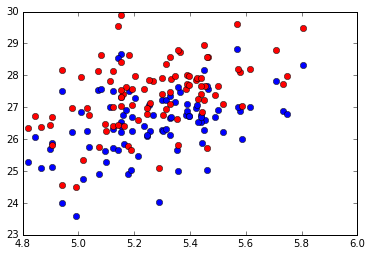

In [12]:
# Plot again
i=1
plt.plot(A[:,i],b,'ob')
plt.plot(A[:,i],b_perturbed,'or')

# What is the new sum of squared errors (after perturbing)?
e2_perturbed = np.linalg.norm(b-b_perturbed,2)**2

print("The sum of squared errors after perturbing is " + str(e2_perturbed))

The sum of squared errors after perturbing is 77.3212252815


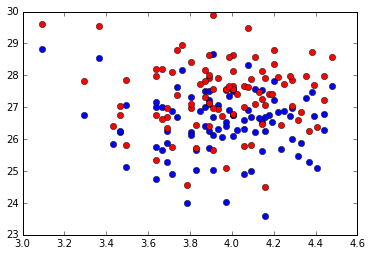

In [13]:
# Plot again
i=2
plt.plot(A[:,i],b,'ob')
plt.plot(A[:,i],b_perturbed,'or')

# What is the new sum of squared errors (after perturbing)?
e2_perturbed = np.linalg.norm(b-b_perturbed,2)**2

print("The sum of squared errors after perturbing is " + str(e2_perturbed))

## Part h

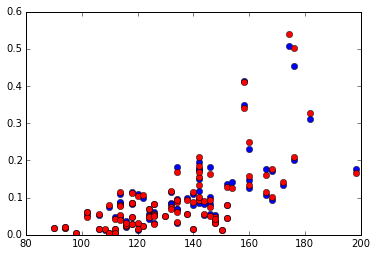

In [14]:
# Noninear plots, pick an index below (0,1,2,etc). This code will plot b and bhat vs Ai
i = 3

# Write an expression for estimated p values here
def transy(y): return 1-0.95**(e**(y-26.1931))
p_estimated = transy(bhat)

plt.plot(np.exp(A[:,i]),p,'ob')
plt.plot(np.exp(A[:,i]),p_estimated,'or')

## Part i

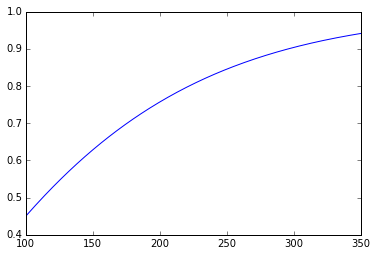

In [15]:
# transform b_test into p_test
p_test = transy(b_test)

plt.plot(tc_test_vector,p_test,'-b')

# Finding Signals in Noise

In [16]:
# Run this first
%matplotlib inline  
import numpy as np
import scipy as sp
import scipy.linalg as la
import pylab as plt
import numpy.random

N = 1000

def rand_vector(n): # returns a random {+1, -1} vector of length n
    return np.random.randint(2, size=n)*2 - 1.0

def rand_normed_vector(n): # returns a random normalized vector of length n
    x = rand_vector(n)
    return x / la.norm(x)

def cross_corr(f, g):
    # returns the cross-correlation (a vector of all the inner-products of 'g' with shifted versions of 'f')
    C = la.circulant(f)
    corr = C.T.dot(g)
    return corr

## Part a

-0.056
-0.056
0.104


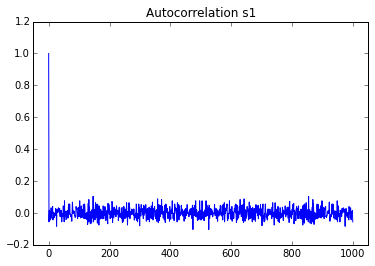

In [17]:
# generate a random normalized vector for s1
# (running this cell again will generate a new random vector)
s1 = rand_normed_vector(N)

# compute all the inner-products of s1 with shifted versions of s1
# (ie, the cross-correlation of s1 with s1)
corr = cross_corr(s1, s1)

# The inner-prouct <s1, s1^(1)> is:
print(corr[1])

# np.roll circularly shifts the signal
# so the above inner-product could be computed as:
print(np.dot(s1, np.roll(s1,1)))

# Plot the autocorrelation:
plt.title("Autocorrelation s1")
plt.plot(corr)

x1,x2,y1,y2 = plt.axis()
plt.axis([x1-50,x2+50,y1,y2])

# (optional code to plot max autocorrelation):
print(np.max(np.abs(corr[1:])))

plt.show()

## Part b

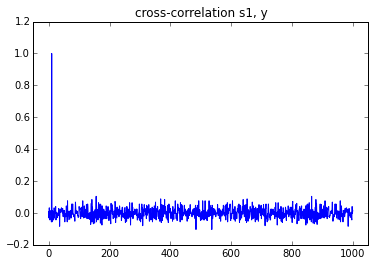

10


In [18]:
y = np.roll(s1, 10) # Received y = s1 shifted by 10

# Compute the cross-correlation (all the inner-products of y with shifted versions of s1)
corr = cross_corr(s1, y)

# Plot
plt.title("cross-correlation s1, y")
plt.plot(corr)

x1,x2,y1,y2 = plt.axis()
plt.axis([x1-50,x2+50,y1,y2])
plt.show()

# Find the index of maximum correlation (inner-product)
print(np.argmax(corr))

## Part c

In [19]:
# generate a random normalized vector for s1,
# and a random normalized vector for n
# (running this cell again will generate new random vectors)
s1 = rand_normed_vector(N)
n = rand_normed_vector(N)

print(np.abs(np.dot(s1, n)))

0.026


## Part d

This is the code from part (b), but with the received signal y additionally corrupted by noise.

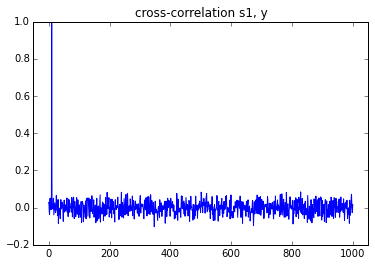

10

In [20]:
s1 = rand_normed_vector(N)
n = rand_normed_vector(N)
y = np.roll(s1, 10) + 0.1*n

corr = cross_corr(s1, y)

plt.title("cross-correlation s1, y")
plt.plot(corr)

x1,x2,y1,y2 = plt.axis()
plt.axis([x1-50,x2+50,y1,y2])
plt.show()

# Find the index of maximum correlation (inner-product)
np.argmax(corr)

## Part e
Copy the code provided for part (d), but modify appropriately so the noise is higher.
You should generate two cross-correlation plots, one for each noise level in the question.
(For example, you can just copy the code from part (d) twice.)

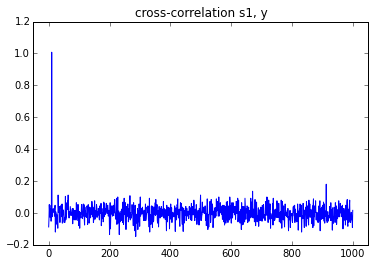

10


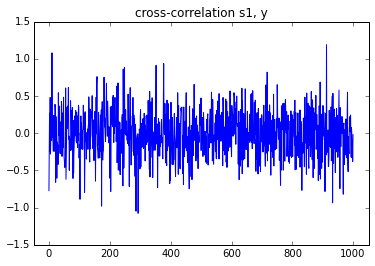

912


In [21]:
## PLOT 1
s1 = rand_normed_vector(N)
n = rand_normed_vector(N)
y = np.roll(s1, 10) + 1*n

corr = cross_corr(s1, y)

plt.title("cross-correlation s1, y")
plt.plot(corr)

x1,x2,y1,y2 = plt.axis()
plt.axis([x1-50,x2+50,y1,y2])
plt.show()

# Find the index of maximum correlation (inner-product)
print(np.argmax(corr))


## PLOT 2
y = np.roll(s1, 10) + 10*n

corr = cross_corr(s1, y)

plt.title("cross-correlation s1, y")
plt.plot(corr)

x1,x2,y1,y2 = plt.axis()
plt.axis([x1-50,x2+50,y1,y2])
plt.show()

# Find the index of maximum correlation (inner-product)
print(np.argmax(corr))

## Part f

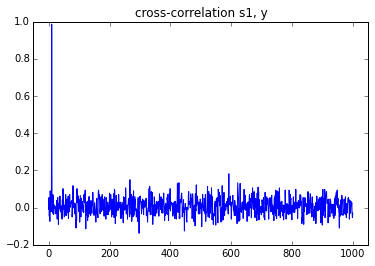

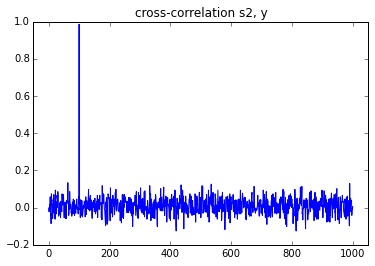

10 100


In [22]:
s1 = rand_normed_vector(N)
s2 = rand_normed_vector(N)

y = np.roll(s1, 10) + np.roll(s2, 100)

# Compute cross-correlations:
corr_s1_y = cross_corr(s1, y)
corr_s2_y = cross_corr(s2, y)

# Plot cross-correlations:
plt.title("cross-correlation s1, y")
plt.plot(cross_corr(s1, y))
x1,x2,y1,y2 = plt.axis()
plt.axis([x1-50,x2+50,y1,y2])
plt.show()

plt.title("cross-correlation s2, y")
plt.plot(cross_corr(s2, y))
x1,x2,y1,y2 = plt.axis()
plt.axis([x1-50,x2+50,y1,y2])
plt.show()

j = np.argmax(corr_s1_y) # find the first signal delay (max index of correlation)
k = np.argmax(corr_s2_y) # find the second signal delay
print(j,k)

## Part g

This is the same code as part (f), but with slight modification to how the received signal y generated.
Run the below cell a few times, to test for different choices of random signals.

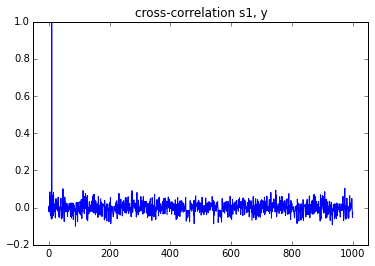

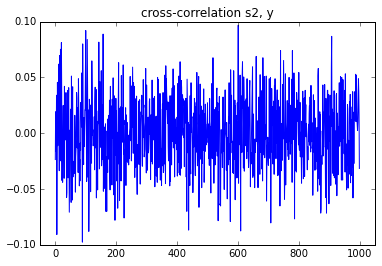

In [23]:
s1 = rand_normed_vector(N)
s2 = rand_normed_vector(N)

y = np.roll(s1, 10) + 0.1*np.roll(s2, 100)

# Compute cross-correlations:
corr_s1_y = cross_corr(s1, y)
corr_s2_y = cross_corr(s2, y)

# Plot cross-correlations:
plt.title("cross-correlation s1, y")
plt.plot(cross_corr(s1, y))
x1,x2,y1,y2 = plt.axis()
plt.axis([x1-50,x2+50,y1,y2])
plt.show()

plt.title("cross-correlation s2, y")
plt.plot(cross_corr(s2, y))
x1,x2,y1,y2 = plt.axis()
plt.axis([x1-50,x2+50,y1,y2])
plt.show()

## Part h

10


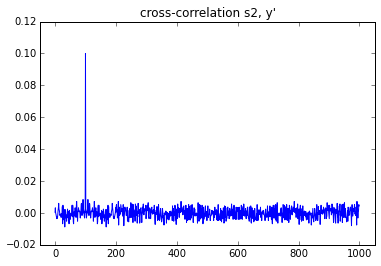

100


In [24]:
corr_s1_y = cross_corr(s1, y)
j = np.argmax(corr_s1_y) # find the first signal delay
print(j)

# subtract out the contribution of the first signal
y_prime = y - np.roll(s1, j)

# correlate the residual against the second signal
corr_s2_y = cross_corr(s2, y_prime)

# Plot 
plt.title("cross-correlation s2, y'")
plt.plot(corr_s2_y)
x1,x2,y1,y2 = plt.axis()
plt.axis([x1-50,x2+50,y1,y2])
plt.show()

k = np.argmax(corr_s2_y) # find the second signal delay by looking at the index of max correlation
print(k)

## Part i

In [25]:
s1 = rand_normed_vector(N)
s2 = rand_normed_vector(N)

y = 0.7*np.roll(s1, 10) + 0.5*np.roll(s2, 100)

corr_s1_y = cross_corr(s1, y)
j = np.argmax(corr_s1_y) # find the first signal delay

corr_s2_y = cross_corr(s2, y)
k = np.argmax(corr_s2_y) # find the second signal delay

print(j, k)

# Once we have found the shifts, estimate the coefficients as inner-products:
a1 = np.dot(y, np.roll(s1, j))
a2 = np.dot(y, np.roll(s2, k))

print(a1, a2)

10 100
0.714 0.5196


## Part j

This is the same code as part (i), but with noise added to the received signal y.

In [26]:
s1 = rand_normed_vector(N)
s2 = rand_normed_vector(N)
n = rand_normed_vector(N)

y = 0.7*np.roll(s1, 10) + 0.5*np.roll(s2, 100) + 0.1*n

corr_s1_y = cross_corr(s1, y)
j = np.argmax(corr_s1_y) # find the first signal delay

corr_s2_y = cross_corr(s2, y)
k = np.argmax(corr_s2_y) # find the second signal delay

print(j, k)

# Once we have found the shifts, estimate the coefficients as inner-products:
a1 = np.dot(y, np.roll(s1, j))
a2 = np.dot(y, np.roll(s2, k))

print(a1, a2)

10 100
0.6874 0.4804


## Part k

In [27]:
# Given the shifts j, k, setup the matrix A and vector b.

# Hint: use np.roll(...) to circularly shift vectors.
# For example, "np.roll(s1, j)" shifts the vector s1 by j indices.
# A has columns c1, c2 which you should FILL IN BELOW.
c1 = np.roll(s1, j)
c2 = np.roll(s2, k)
A = np.array([c1, c2]).T

b = y

# Solve to find the linear least-square solution of Ax ~ b (minimizing error ||Ax - b||)
xhat = la.inv(A.T.dot(A)).dot(A.T).dot(b)
print(xhat)

[ 0.70036385  0.49860946]


## Part l

In [28]:
# Load the signal vectors from file.
npzfile = np.load("signals.npz")
y, s1, s2, s3 = [npzfile[f] for f in ['y','s1','s2','s3']]

Try to find the delays and coefficients of the three signals s1, s2, s2, from your received signal y.
Hint: Make use of the provided code in the previous parts. This should be possible by mostly copy/pasting code.
In particular, remember:

- "np.roll(s1, 123)" circularly shifts vector s1 by 123
- "np.argmax(corr)" finds the index of the maximum entry in vector "corr".

Once you have found candidate delays j, k, l, try running the following function. You should recognize the output.

In [29]:
# Test your j,k,l by running this function:
def test(j,k,l):
    return [chr(int(i)) for i in (np.array([j,k,l])/20 + 60)]

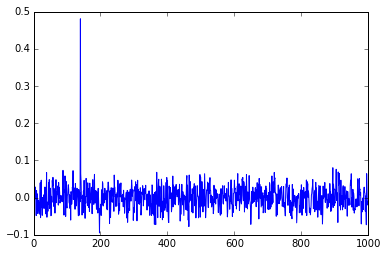

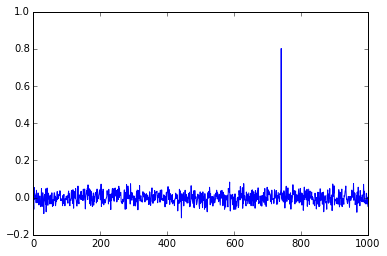

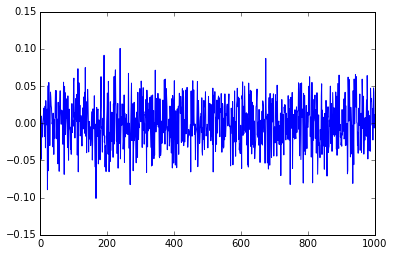

In [30]:
# First, let's correlating against all 3 signals:
corr_s1_y = cross_corr(s1, y)
corr_s2_y = cross_corr(s2, y)
corr_s3_y = cross_corr(s3, y)

plt.plot(corr_s1_y)
plt.show()
plt.plot(corr_s2_y)
plt.show()
plt.plot(corr_s3_y)
plt.show()

In [31]:
# The first two signals seem strong, let us find their shift:
j = np.argmax(corr_s1_y)
print(j)

k = np.argmax(corr_s2_y)
print(k)

# Let's try to to estimate the coefficients \alpha_1, \alpha_2 as inner-products:
a1 = corr_s1_y[j]
a2 = corr_s2_y[k]
print(a1, a2)

140
740
0.480672 0.801536


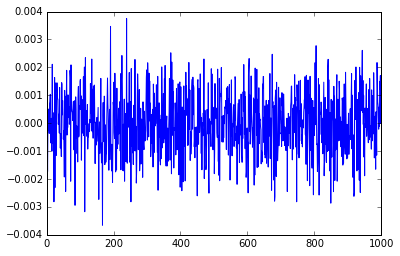

In [32]:
# Now if we try to subtract out the first two using our coefficient estimates...

y3 = y - a1*np.roll(s1, j) - a2*np.roll(s2, k)

# Plot correlation with s3:
corr_s3_y = cross_corr(s3, y3)
plt.plot(corr_s3_y)
plt.show()

In [33]:
# That doesn't seem to work. Let us try using Least-Squares to estimate the coefficients.

# NOTE: This code is exactly copied from the provided code of part (k)

# Given ths shifts j, k, setup the columns of A:
c1 = np.roll(s1, j)
c2 = np.roll(s2, k)
A = np.array([c1, c2]).T
b = y
xhat = la.inv(A.T.dot(A)).dot(A.T).dot(b)
print(xhat)

a1, a2 = xhat

[ 0.5101885   0.81990279]


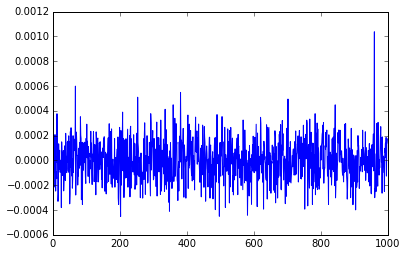

In [34]:
# Subtract out using our new estimates:
y3 = y - a1*np.roll(s1, j) - a2*np.roll(s2, k)

# Plot correlation with s3:
corr_s3_y = cross_corr(s3, y3)
plt.plot(corr_s3_y)
plt.show()

In [35]:
# Now there's a clear peak!
l = np.argmax(corr_s3_y)
print(l)

960


In [36]:
print(test(j,k,l))

['C', 'a', 'l']


#Deconstructing Trolls

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import wave as wv
import scipy
from scipy import io
import scipy.io.wavfile
from scipy.io.wavfile import read
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')
sound_file_1 = 'm1.wav'
sound_file_2 = 'm2.wav'
rate1,corrupt1 = scipy.io.wavfile.read('m1.wav')
rate2,corrupt2 = scipy.io.wavfile.read('m2.wav')

Just as last time, let's listen to the inputs. 

In [2]:
Audio(url='m1.wav', autoplay=False)

In [3]:
Audio(url='m2.wav', autoplay=False)

In [6]:
def remove_troll(m1, m2):
    ##Your code here
    A = np.vstack((m2,m1))
    A = A.T
    Q, R = np.linalg.qr(A)
    
    a = Q[:,1]
    b = Q[:,0]
    return a, b

Run the cell below to test your function 

In [7]:
a, b = remove_troll(corrupt1, corrupt2)
Audio(data=a, rate=rate1)

Let's now compare our output here to the output from Homework 1. Read through the block of code below and comment on it's output

In [8]:
## First let's compute the original vectors representing the speakers using the technique in Homework 1)
a_u = np.sqrt(2)/(1+np.sqrt(3))
a_v = np.sqrt(6)/(1+np.sqrt(3))
b_u = np.sqrt(2)/(1+np.sqrt(3))
b_v = -1*np.sqrt(2)/(1+np.sqrt(3))
s1 = a_u*corrupt1 + a_v*corrupt2
s2 = b_u*corrupt1 + b_v*corrupt2

## Here we will compute various dot products to see which vectors are orthogonal.
## Note that we normalize the vectors before we compare, this is because we want 
## to get rid of any scaling.
print("Dot product of the two original speaker outputs ", np.dot(s1/np.linalg.norm(s1), s2/np.linalg.norm(s2)))
print("Dot product of calculated a and b", np.dot(a/np.linalg.norm(a), b/np.linalg.norm(b)))

Dot product of the two original speaker outputs  -0.00379040459598
Dot product of calculated a and b -1.64463093412e-16
